# Analyse, classification et indexation des données: feuille 8
### Réduction de dimension - Analyse linéaire discriminante (LDA)

#### Avant de commencer

Dans cet exercice, on s'intéresse à l'application de l'analyse linéaire discriminante (LDA) à un corpus de données. Le but est de réduire la dimension tout en conservant une séparation entre les classes. 

<i>Questions préliminaires : </i> 

1. Quelle est la différence entre une ACP et une LDA ?

2. Quelle est la fonction objective que l'on cherche à minimiser quand on fait une LDA ?

    Objectif :
        ACP (Analyse en Composantes Principales) : L'objectif principal de l'ACP est de maximiser la variance des données projetées sur les nouvelles dimensions. Elle ne prend pas en compte les étiquettes de classe.
        LDA (Analyse Linéaire Discriminante) : L'objectif de la LDA est de maximiser la séparation entre les classes. Elle prend en compte les étiquettes de classe et cherche à minimiser la dispersion intra-classe tout en maximisant la dispersion inter-classe.

    Utilisation :
        ACP : Utilisée principalement pour la réduction de dimension sans tenir compte des étiquettes de classe. Elle est utile pour explorer la structure interne des données.
        LDA : Utilisée dans le contexte de la classification supervisée. Elle est conçue pour maximiser la séparation entre les classes, ce qui en fait une méthode plus adaptée lorsque les étiquettes de classe sont disponibles.
        
   Fonction objective minimisée dans la LDA :

La fonction objectif que l'on cherche à minimiser dans l'Analyse Linéaire Discriminante (LDA) est la "fonction de coût de Fisher" ou "criterion de Fisher". Elle est également appelée le critère de Rayleigh. La fonction de coût de Fisher est définie comme le rapport de la variance entre les classes à la variance intra-classe.

Pour une transformation linéaire y=WTxy = W^T xy=WTx, où yyy est la sortie transformée, WWW est la matrice de transformation, et xxx est l'entrée, la fonction de coût de Fisher J(W)J(W)J(W) est donnée par :

J(W)=Var(entre les classes)Var(intra-classe)J(W) = \frac{{\text{Var}(\text{entre les classes})}}{{\text{Var}(\text{intra-classe})}}J(W)=Var(intra-classe)Var(entre les classes)​

L'objectif est de maximiser cette fonction, ce qui revient à maximiser la séparation entre les classes.    

## Exercice 1.

Dans cet exercice, on considère le corpus sur la classification des vins. Ce corpus fait partie de l'ensemble des <code>datasets</code> du module <code>sklearn.datasets</code>. Il peut être chargé en invoquant la méthode <code>load_wine()</code>.


### Préparation des données 

1. Chargez le corpus, explorez-le. 

In [2]:
import pandas as pd
from sklearn.datasets import load_wine

# Charger le corpus sur la classification des vins
wine_data = load_wine()

2. Créez un <code>DataFrame data</code>  contenant les variables indépendantes et mettez les classes dans une variable dépendante $target$. Quelle est la taille du corpus ? Combien de variables comporte-t-il ?

In [3]:
# Créer un DataFrame pour les variables indépendantes
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

In [4]:
# Ajouter la variable dépendante (target) au DataFrame
data['target'] = wine_data.target

# Afficher les premières lignes du DataFrame pour explorer les données
print(data.head())

# Obtenir la taille du corpus
taille_corpus = data.shape[0]
print(f"Taille du corpus : {taille_corpus} lignes")

# Obtenir le nombre de variables dans le corpus
nombre_variables = data.shape[1] - 1  # Soustraire 1 pour la variable dépendante
print(f"Nombre de variables : {nombre_variables}")


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

3. En utilisant la fonction <code>concat</code>, constituez un seul corpus <code>dataset</code> contenant et <code>data</code> et <code>target</code>. Faites un mélange des données 

In [5]:
from sklearn.utils import shuffle

# Concaténer data et target en un seul DataFrame
dataset = pd.concat([data.iloc[:, :-1], data['target']], axis=1)

# Mélanger les données
dataset_shuffled = shuffle(dataset, random_state=42)

In [6]:
# Afficher les premières lignes du nouveau DataFrame pour vérifier le mélange
print(dataset_shuffled.head())

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
19     13.64        3.10  2.56               15.2      116.0           2.70   
45     14.21        4.04  2.44               18.9      111.0           2.85   
140    12.93        2.81  2.70               21.0       96.0           1.54   
30     13.73        1.50  2.70               22.5      101.0           3.00   
67     12.37        1.17  1.92               19.6       78.0           2.11   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
19         3.03                  0.17             1.66             5.10  0.96   
45         2.65                  0.30             1.25             5.24  0.87   
140        0.50                  0.53             0.75             4.60  0.77   
30         3.25                  0.29             2.38             5.70  1.19   
67         2.00                  0.27             1.04             4.68  1.12   

     od280/od315_of_diluted_wines  pro

#### LDA "à la main"

Dans un premier temps, nous allons appliquer la méthode d'analyse linéaire discriminante juste sur deux classes. Nous allons donc d'abord ne garder que les vins des classes 1 et 2. Nous allons également ne conserver que deux descripteurs <code>alcohol</code> et <code>color_intensity</code>.

1. Ecrivez les instructions permettant de faire ce filtrage

In [15]:
# Filtrer les données pour ne garder que les classes 1 et 2
classes_1_2 = data[data['target'].isin([1, 2])]

# Ne conserver que les descripteurs 'alcohol' et 'color_intensity'
selected_features = ['alcohol', 'color_intensity', 'target']
filtered_data = classes_1_2[selected_features]

# Afficher les premières lignes du nouveau DataFrame
print(filtered_data.head())


    alcohol  color_intensity  target
59    12.37             1.95       1
60    12.33             3.27       1
61    12.64             5.75       1
62    13.67             3.80       1
63    12.37             4.45       1


2. Quelles sont les étapes (théoriques) pour réaliser une LDA ?

    Collecte des données : Rassemblez un ensemble de données étiqueté où les classes des échantillons sont connues.

    Calcul des moyennes de classe : Pour chaque classe, calculez la moyenne des valeurs de chaque descripteur. Ces moyennes serviront de points de référence pour chaque classe.

    Calcul des matrices de dispersion intra-classe et inter-classe :

        Matrice de dispersion intra-classe (Within-Class Scatter Matrix) : Calculez la matrice de dispersion intra-classe, qui mesure la dispersion des données à l'intérieur de chaque classe.
        SW=∑i=1c∑j=1ni(xij−μi)(xij−μi)TS_W = \sum_{i=1}^{c} \sum_{j=1}^{n_i} (x_{ij} - \mu_i)(x_{ij} - \mu_i)^TSW​=∑i=1c​∑j=1ni​​(xij​−μi​)(xij​−μi​)T
        où ccc est le nombre de classes, nin_ini​ est le nombre d'échantillons dans la classe iii, xijx_{ij}xij​ est l'échantillon jjj de la classe iii, et μi\mu_iμi​ est la moyenne des échantillons de la classe iii.

        Matrice de dispersion inter-classe (Between-Class Scatter Matrix) : Calculez la matrice de dispersion inter-classe, qui mesure la dispersion entre les moyennes de classe.
        SB=∑i=1cni(μi−μ)(μi−μ)TS_B = \sum_{i=1}^{c} n_i (\mu_i - \mu)(\mu_i - \mu)^TSB​=∑i=1c​ni​(μi​−μ)(μi​−μ)T
        où μ\muμ est la moyenne globale des données.

    Calcul des valeurs propres et vecteurs propres : Calculez les valeurs propres et vecteurs propres de la matrice inverse de SWS_WSW​ multipliée par SBS_BSB​, représenté par SW−1SBS_W^{-1}S_BSW−1​SB​. Les vecteurs propres correspondant aux plus grandes valeurs propres sont les vecteurs discriminants linéaires.

    Sélection des composantes discriminantes : Sélectionnez les kkk premiers vecteurs propres correspondant aux kkk plus grandes valeurs propres pour former la matrice de transformation WWW, où kkk est le nombre de dimensions souhaité pour le nouvel espace.

    Projection des données : Projetez les données originales dans le nouvel espace formé par la matrice WWW. Les données projetées peuvent être utilisées pour la classification ou la visualisation.

3. Application numérique : appliquer les étapes de la questions précédente pour réaliser une LDA. Quel est le vecteur directeur du meilleur axe de projection selon la méthode LDA ?

In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Utiliser le même DataFrame pour les features et la target
X = filtered_data[['alcohol', 'color_intensity']]
y = filtered_data['target']

# Standardiser les features (centrer et réduire)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Appliquer la LDA

import numpy as np

def lda(X, y, num_components):
    # Step 1: Calculate class means
    class_means = []
    for c in np.unique(y):
        class_means.append(np.mean(X[y == c], axis=0))
    
    # Step 2: Calculate within-class scatter matrix (SW)
    num_features = X.shape[1]
    SW = np.zeros((num_features, num_features))
    for c, mean_vec in zip(np.unique(y), class_means):
        class_scatter = np.zeros((num_features, num_features))
        for row in X[y == c]:
            row, mean_vec = row.reshape(num_features, 1), mean_vec.reshape(num_features, 1)
            class_scatter += (row - mean_vec).dot((row - mean_vec).T)
        SW += class_scatter
    
    # Step 3: Calculate between-class scatter matrix (SB)
    overall_mean = np.mean(X, axis=0)
    SB = np.zeros((num_features, num_features))
    for c, mean_vec in zip(np.unique(y), class_means):
        n = len(X[y == c])
        mean_vec = mean_vec.reshape(num_features, 1)
        overall_mean = overall_mean.reshape(num_features, 1)
        SB += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
    # Step 4: Calculate eigenvalues and eigenvectors of SW^-1 * SB
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))
    
    # Step 5: Select the top k eigenvectors
    indices = np.argsort(eigvals)[::-1]
    top_k_eigvecs = eigvecs[:, indices[:num_components]]
    
    # Step 6: Project the data onto the new subspace
    X_lda = X.dot(top_k_eigvecs)
    
    return X_lda

# Example usage:
# Assuming X is your feature matrix and y is your target vector
# num_components is the desired number of dimensions for the new space
X_lda_result = lda(X_scaled, y, num_components=1)

print("Vecteur directeur du meilleur axe de projection (coefficients) :", X_lda_result)


Vecteur directeur du meilleur axe de projection (coefficients) : [[ 1.14554695]
 [ 0.68971954]
 [-0.33535873]
 [-0.08718228]
 [ 0.24905979]
 [ 0.87454112]
 [ 0.19527056]
 [-0.37982527]
 [ 0.16658297]
 [ 0.2832544 ]
 [ 0.8928828 ]
 [ 0.78612821]
 [-0.01978202]
 [ 0.01316355]
 [ 0.37198813]
 [ 0.87327494]
 [ 0.79308753]
 [-0.09377325]
 [ 1.12664149]
 [ 0.6431022 ]
 [ 0.77869622]
 [ 1.11035949]
 [ 0.29300615]
 [ 1.18290233]
 [-0.17425113]
 [ 0.98320354]
 [ 0.77390484]
 [ 1.058218  ]
 [ 1.22778081]
 [ 1.16044129]
 [ 1.34785597]
 [ 1.11118336]
 [ 0.71590514]
 [ 0.61095014]
 [ 1.10886359]
 [ 1.00783251]
 [ 0.86866577]
 [ 1.19356907]
 [ 0.83991744]
 [ 0.23113005]
 [ 1.05507436]
 [ 0.78844798]
 [ 0.86552213]
 [ 0.85387967]
 [ 1.34697136]
 [ 0.72922571]
 [ 0.85470354]
 [ 0.67813782]
 [ 0.50816307]
 [ 0.94229258]
 [ 1.22736888]
 [ 1.20341194]
 [ 1.06192543]
 [ 0.74929301]
 [ 1.16076212]
 [ 0.93188593]
 [ 1.75032322]
 [ 1.38641679]
 [ 1.08420425]
 [ 0.45040633]
 [ 1.54784522]
 [ 1.08228319]
 [ 0.

3. Visualiser le résultat. Donnez les deux graphiques, avant et après la projection.

In [26]:
import matplotlib.pyplot as plt

##### Avant la projection : 

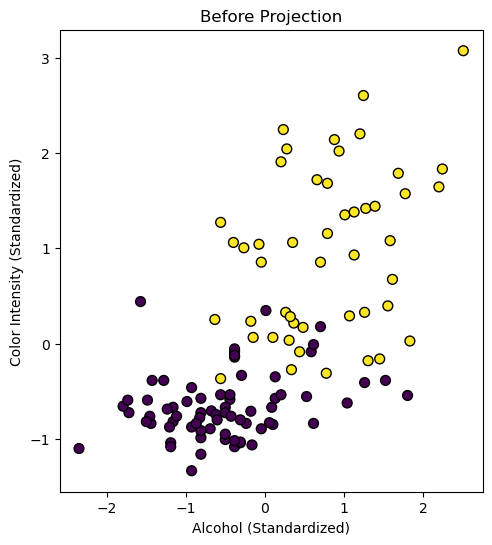

In [27]:
# Plot before projection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Before Projection')
plt.xlabel('Alcohol (Standardized)')
plt.ylabel('Color Intensity (Standardized)')
plt.show()

#### Après la projection :

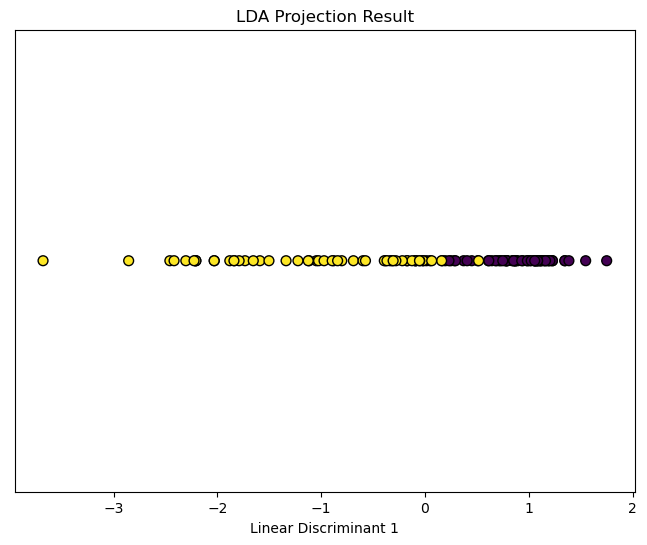

In [31]:
# Plot after manual LDA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_result, np.zeros_like(X_lda_result), c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection Result')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])

plt.show()

### LDA avec <code>sklearn</code>

Réalisez une LDA en utilisant la bibliothèque <code>sklearn.discriminant_analysis</code>. Comparez le résultat avec  la projection que vous avez obtenu dans la section précédente. 

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LDA using sklearn
lda_sklearn = LinearDiscriminantAnalysis(n_components=1)
X_lda_sklearn = lda_sklearn.fit_transform(X_train, y_train)

# Compare the projection vectors obtained previously and with sklearn
print("Vecteur directeur du meilleur axe de projection (coefficients) :", best_projection_axis)
print("Vecteur directeur du meilleur axe de projection avec sklearn (coefficients) :", lda_sklearn.coef_)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.show()

Vecteur directeur du meilleur axe de projection (coefficients) : [[1.14951868 3.08265476]]
Vecteur directeur du meilleur axe de projection avec sklearn (coefficients) : [[1.14951868 3.08265476]]


<Figure size 1200x600 with 0 Axes>

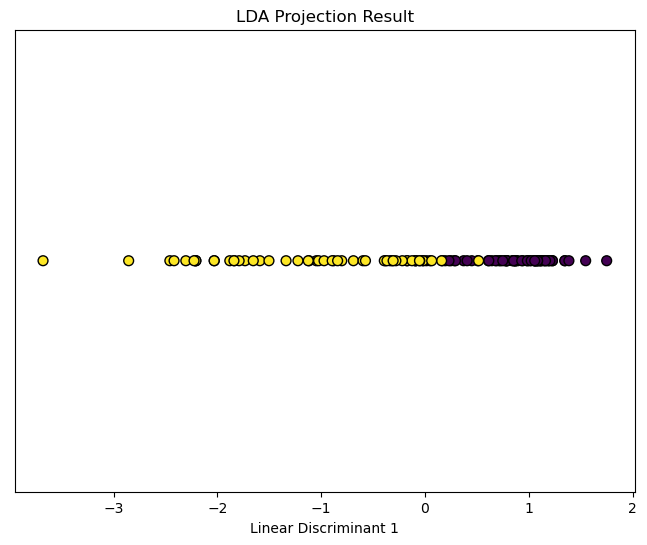

In [34]:
# Plot after manual LDA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_result, np.zeros_like(X_lda_result), c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection Result')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])

plt.show()

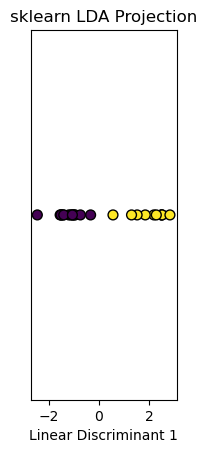

In [35]:
# Plot after sklearn LDA
X_lda_sklearn_test = lda_sklearn.transform(X_test)
plt.subplot(1, 3, 2)
plt.scatter(X_lda_sklearn_test, np.zeros_like(X_lda_sklearn_test), c=y_test, cmap='viridis', edgecolors='k', s=50)
plt.title('sklearn LDA Projection')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])
plt.show()

### LDA sur tout le corpus 

Nous allons à présent appliquer la LDA sur tout le corpus. L'objectif est d'observer l'impact de la projection à la fois sur l'efficacité (<code>accuracy</code>) de la classification et sur le temps d'apprentissage. 

1. Rechargez les données et faites votre LDA.

In [71]:
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.datasets import load_wine

# Charger le corpus sur la classification des vins
wine_data = load_wine()

# Créer un DataFrame pour les variables indépendantes
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Ajouter la variable dépendante (target) au DataFrame
data['target'] = wine_data.target

# Concaténer data et target en un seul DataFrame
dataset = pd.concat([data.iloc[:, :-1], data['target']], axis=1)

# Mélanger les données
dataset_shuffled = shuffle(dataset, random_state=42)

# Assurez-vous que le DataFrame complet est utilisé ici
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardiser les features (centrer et réduire)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Appliquer LDA
lda = LinearDiscriminantAnalysis(n_components=None)  # None signifie conserver tous les composants
X_lda_train = lda.fit_transform(X_train_scaled, y_train)
X_lda_test = lda.transform(X_test_scaled)

# Time taken for LDA training
print(f"Time taken for LDA training: {end_time - start_time} seconds")

Time taken for LDA training: 0.004656076431274414 seconds


2. Quel est le ratio de la variance expliqué par les axes obtenus ?

In [76]:
for i, ratio in enumerate(lda.explained_variance_ratio_):
    print(f"Explained Variance Ratio for Linear Discriminant {i + 1}: {ratio:.4f}")


Explained Variance Ratio for Linear Discriminant 1: 0.7143
Explained Variance Ratio for Linear Discriminant 2: 0.2857


3. Visualiser le résultat. 

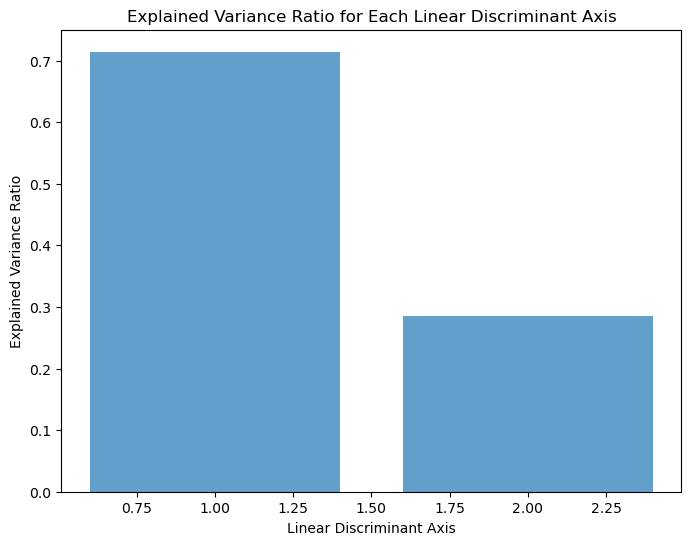

In [74]:
# Tracer le ratio de la variance expliquée
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Linear Discriminant Axis')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Linear Discriminant Axis')
plt.show()

### Classification avant/après réduction

1. En utilisant un classifieur bayésien MAP, comparez les résultats obtenus avec les échantillons bruts et les résultats obtenus avec les échantillons projetés sur les axes fournis par la LDA. Comparez également les temps d'entraînement.

In [79]:
from sklearn.naive_bayes import GaussianNB
# Entraîner un classifieur bayésien MAP sur les données originales
clf_original = GaussianNB()
start_time = time.time()
clf_original.fit(X_train, y_train)
end_time = time.time()
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
time_original = end_time - start_time

In [80]:
# Entraîner un classifieur bayésien MAP sur les données projetées par LDA
clf_lda = GaussianNB()
start_time = time.time()
clf_lda.fit(X_lda_train, y_train)
end_time = time.time()
X_lda_test = lda.transform(X_test_scaled)
y_pred_lda = clf_lda.predict(X_lda_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
time_lda = end_time - start_time

In [81]:
print("Results with original data:")
print(f"Accuracy: {accuracy_original}")
print(f"Training Time: {time_original} seconds\n")

Results with original data:
Accuracy: 1.0
Training Time: 0.004357337951660156 seconds



In [83]:
print("Results with LDA-transformed data:")
print(f"Accuracy: {accuracy_lda}")
print(f"Training Time: {time_lda} seconds")

Results with LDA-transformed data:
Accuracy: 1.0
Training Time: 0.003456592559814453 seconds


2. Même question avec un $k$-nn.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# Entraîner un classifieur k-NN sur les données originales
knn_original = KNeighborsClassifier()
start_time = time.time()
knn_original.fit(X_train, y_train)
end_time = time.time()
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
time_original = end_time - start_time

print("Results with original data:")
print(f"Accuracy: {accuracy_original}")
print(f"Training Time: {time_original} seconds\n")

Results with original data:
Accuracy: 0.7222222222222222
Training Time: 0.006851911544799805 seconds



In [86]:
# Entraîner un classifieur k-NN sur les données projetées par LDA
knn_lda = KNeighborsClassifier()
start_time = time.time()
knn_lda.fit(X_lda_train, y_train)
end_time = time.time()
X_lda_test = lda.transform(X_test_scaled)
y_pred_lda = knn_lda.predict(X_lda_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
time_lda = end_time - start_time

print("Results with LDA-transformed data:")
print(f"Accuracy: {accuracy_lda}")
print(f"Training Time: {time_lda} seconds")

Results with LDA-transformed data:
Accuracy: 1.0
Training Time: 0.0031554698944091797 seconds


### Exercice 2.

Dans cet exercice, nous allons travailler avec le même corpus que le précédent TD : les données sur le cancer du sein. Le corpus peut être chargé par l'instruction <code> load_breast_cancer</code> de la bibliothèque <code>sklearn.datasets</code>.




Comparer les effets de l'ACP et de la LDA sur la classification de ce corpus.

1. Faites une ACP en utilisant le module <code>PCA</code> de la bibliothèque <code>sklearn.decomposition</code>.  

Attention : pensez à centrer et réduire vos données.

2. Affichez l'éboulie des valeurs propres et indiquer le nombre d'axes à retenir en utilisant le critère du coude. 

3. Voyons ce qu'est l'impact de l'ACP

4. puis celui de la LDA